# Hazardous Nature of Asteroids

The majority of near-Earth objects have orbits that don’t bring them very close to Earth, and therefore pose no risk of impact, but a small fraction of them – called potentially hazardous asteroids – require more attention. These objects are defined as asteroids that are more than about 460 feet (140 meters) in size with orbits that bring them as close as within 4.6 million miles and can have potenial threat.


---

So in this notebook would deal with ML Techniques to predict the Hazardous Nature of Asteroids

#Importing Libraries

In [ ]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")


from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import auc


import tensorflow as tf


#Load Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the dataset
data = pd.read_csv('/content/drive/MyDrive/nasa.csv')
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,Epoch Date Close Approach,Relative Velocity km per sec,Relative Velocity km per hr,Miles per hour,Miss Dist.(Astronomical),Miss Dist.(lunar),Miss Dist.(kilometers),Miss Dist.(miles),Orbiting Body,Orbit ID,Orbit Determination Date,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-01,788947200000,6.115834,22017.003799,13680.509944,0.419483,163.178711,62753692.0,38993336.0,Earth,17,2017-04-06 08:36:37,5,0.025282,4.634,2458000.5,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,1995-01-01,788947200000,18.113985,65210.346095,40519.173105,0.383014,148.992630,57298148.0,35603420.0,Earth,21,2017-04-06 08:32:49,3,0.186935,5.457,2458000.5,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,1995-01-08,789552000000,7.590711,27326.560182,16979.661798,0.050956,19.821890,7622911.5,4736657.5,Earth,22,2017-04-06 09:20:19,0,0.043058,4.557,2458000.5,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,1995-01-15,790156800000,11.173874,40225.948191,24994.839864,0.285322,110.990387,42683616.0,26522368.0,Earth,7,2017-04-06 09:15:49,6,0.005512,5.093,2458000.5,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,1995-01-15,790156800000,9.840831,35426.991794,22012.954985,0.407832,158.646713,61010824.0,37910368.0,Earth,25,2017-04-06 08:57:58,1,0.034798,5.154,2458000.5,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


# Pre-Processing

In [ ]:
print(data.shape)
print(data.info())

(4687, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64

Dataset contains the informaion about 4687 asteroids with 40 features.

In [ ]:
# missing value in the data
round((data.isnull().sum()),2).sort_values(ascending=False)

Hazardous                       0
Equinox                         0
Miss Dist.(lunar)               0
Miss Dist.(Astronomical)        0
Miles per hour                  0
Relative Velocity km per hr     0
Relative Velocity km per sec    0
Epoch Date Close Approach       0
Close Approach Date             0
Est Dia in Feet(max)            0
Est Dia in Feet(min)            0
Est Dia in Miles(max)           0
Est Dia in Miles(min)           0
Est Dia in M(max)               0
Est Dia in M(min)               0
Est Dia in KM(max)              0
Est Dia in KM(min)              0
Absolute Magnitude              0
Name                            0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Asc Node Longitude              0
Mean Motion                     0
Mean Anomaly                    0
Perihelion Time                 0
Aphelion Dist                   0
Perihelion Arg                  0
Perihelion Distance             0
Orbital Period

This dataset not contain any missing values.

In [ ]:
# find the unique values
data.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
E

'Orbiting Body' and 'Equinox' contain one value for all the data.  
'Neo Reference ID', 'Name','Close Approach Date','Epoch Date Close Approach','Orbit ID','Orbit Determination Date','Epoch Osculation', and 'Perihelion Time' contain some level of unique data or text data that are less interest.  
So, we can drop all these variables.

In [ ]:
# drop the mentioned variables from the dataset
df = data.drop(['Orbiting Body','Equinox','Neo Reference ID', 'Name','Close Approach Date','Epoch Date Close Approach','Orbit ID','Orbit Determination Date','Epoch Osculation','Perihelion Time'], axis = 1)
df.shape

(4687, 30)

## Correlation among the variables

In [ ]:
mask = np.zeros_like(df.corr(method='pearson'), dtype=np.bool)
tt = np.triu_indices_from(mask)
mask[np.triu_indices_from(mask,k=0)]=True
cmap = sns.diverging_palette(10,129,s=50, as_cmap=True)

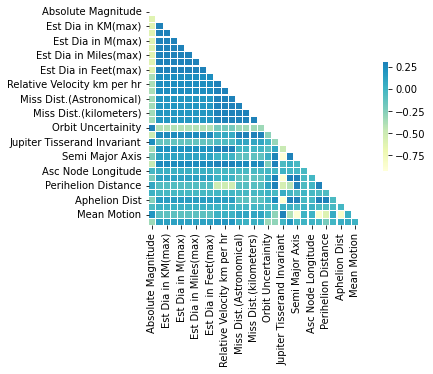

In [ ]:
sns.heatmap(df.corr(method='pearson'), mask=mask, cmap="YlGnBu",vmax=0.3, center=0, square=True, linewidths=0.1, cbar_kws={"shrink": 0.5})

Min and max estimated diameter have measured in several units like Km, m, Miles, and Feet. All the variables shows an perfect correlation to each other. We can keep one variable to measure the estimated diameter. So we are going to **keep _'Est Dia in KM(min)'_**.  
Relative velocity has also measured in three different units they are perfectly correlated to each other. We are going to **keep _'Relative Velocity km per hr'_**  
'Miss Dist.' also has shows same charecteristics as above two. So, we are going to **keep _'Miss Dist.(kilometers)'_**

In [ ]:
# drop the mentioned variables from the dataset
df = df.drop(['Est Dia in KM(max)','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)',
             'Relative Velocity km per sec','Miles per hour',
             'Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)'],axis = 1)
print(df.shape)
df.head()

(4687, 18)


,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,21.6,0.127220,22017.003799,62753692.0,5,0.025282,4.634,0.425549,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,264.837533,0.590551,True
1,21.3,0.146068,65210.346095,57298148.0,3,0.186935,5.457,0.351674,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,173.741112,0.845330,False
2,20.3,0.231502,27326.560182,7622911.5,0,0.043058,4.557,0.348248,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,292.893654,0.559371,True
3,27.4,0.008801,40225.948191,42683616.0,6,0.005512,5.093,0.216578,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,68.741007,0.700277,False
4,21.6,0.127220,35426.991794,61010824.0,1,0.034798,5.154,0.210448,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,135.142133,0.726395,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Absolute Magnitude           4687 non-null   float64
 1   Est Dia in KM(min)           4687 non-null   float64
 2   Relative Velocity km per hr  4687 non-null   float64
 3   Miss Dist.(kilometers)       4687 non-null   float64
 4   Orbit Uncertainity           4687 non-null   int64  
 5   Minimum Orbit Intersection   4687 non-null   float64
 6   Jupiter Tisserand Invariant  4687 non-null   float64
 7   Eccentricity                 4687 non-null   float64
 8   Semi Major Axis              4687 non-null   float64
 9   Inclination                  4687 non-null   float64
 10  Asc Node Longitude           4687 non-null   float64
 11  Orbital Period               4687 non-null   float64
 12  Perihelion Distance          4687 non-null   float64
 13  Perihelion Arg    

In [ ]:
mask = np.zeros_like(df.corr(method='pearson'), dtype=np.bool)
tt = np.triu_indices_from(mask)
mask[np.triu_indices_from(mask,k=0)]=True
cmap = sns.diverging_palette(10,129,s=50, as_cmap=True)

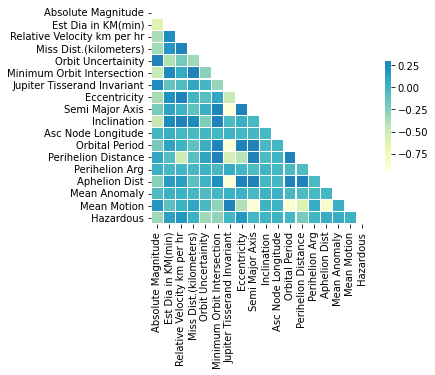

In [ ]:
sns.heatmap(df.corr(method='pearson'), mask=mask, cmap="YlGnBu",vmax=0.3, center=0, square=True, linewidths=0.1, cbar_kws={"shrink": 0.5})

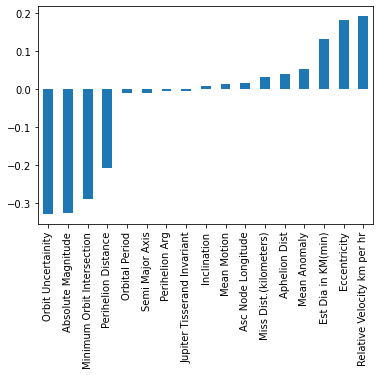

In [ ]:
# To get a more clear picture of the correlation with Hazardous Nature
df.corr()['Hazardous'][:-1].sort_values().plot(kind='bar')
plt.show()

Let's separate the variable of interest as the response variable and all the other variables as the predictor variables.

#Train Test Split
80% of the dataset is used to train the classification models and remaining 20% is used for the eveluations

In [ ]:
y=df.iloc[:,-1].values
x=df.iloc[:,:-1].values

In [ ]:
# split data set into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=2)
print(train_x.shape)
print(test_x.shape)

(3749, 17)
(938, 17)


In [ ]:
# define a function to train and test the models
def train_model(model, train_x, train_y):
    model.fit(train_x, train_y)
    return model
    
def test_model(model,test_x,test_y):
  predictions = model.predict(test_x)
  accuracy = model.score(test_x, test_y)
  metrics_report = classification_report(test_y, predictions)
  precision, recall, fscore, train_support = score(test_y, predictions, average='weighted')
  return predictions,accuracy, metrics_report, (precision, recall, fscore)

#FEATURE SCALING


In [ ]:
#Scale The Datapoint 
sc= StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

#C01:SELECTION OF BASE LEARNERS


###Logistic Regression


In [ ]:
# define the model
log_model = LogisticRegression(penalty='l2', max_iter=500)

# fit the model
log_model= train_model(log_model, train_x,train_y)
print(log_model)

LogisticRegression(max_iter=500)


## Naive Bayes Classifier

In [ ]:
# define the model
nb_model = GaussianNB()

# fit the model
nb_model= train_model(nb_model, train_x,train_y)
print(nb_model)

GaussianNB()


## Decision Tree Classifier


In [ ]:
# define the model
dt_model = DecisionTreeClassifier(random_state=42)

# fit the model
dt_model = train_model(dt_model, train_x, train_y)
print(dt_model)

DecisionTreeClassifier(random_state=42)


#C02:Ensemble Learning - Meta heuristics

###Majority or Hard Voting

In [ ]:
estimators=[('LogisticRegression',log_model),('Naives Bayes',nb_model),('Decision Tree',dt_model)]

# define the model
hard_model = VotingClassifier(estimators=estimators, voting ='hard')

# fit and predict
hard_model = train_model(hard_model, train_x, train_y)
print(hard_model)

VotingClassifier(estimators=[('LogisticRegression',
                              LogisticRegression(max_iter=500)),
                             ('Naives Bayes', GaussianNB()),
                             ('Decision Tree',
                              DecisionTreeClassifier(random_state=42))])


### Random Forest

In [ ]:
labels = df.Hazardous.unique()

# define the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0, random_state=2)

# fit the model
rf_model = train_model(rf_model, train_x, train_y)
print(rf_model)

RandomForestClassifier(max_depth=100, min_samples_split=10, n_jobs=-1,
                       random_state=2)


## Gradient Boosting

In [ ]:
# define the model
gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=10, random_state=2)

# fit the model
gb_model = train_model(gb_model, train_x, train_y)
print(gb_model)

GradientBoostingClassifier(max_depth=10, n_estimators=50, random_state=2)


#C03:Dimensionality Reduction - PCA

In [ ]:
pca = PCA(n_components=10)
train_x1 = pca.fit_transform(train_x)
test_x1 = pca.transform(test_x)

# Logistic Regression

In [ ]:
# define the model
logpca_model = LogisticRegression(penalty='l2', max_iter=500)

# fit the model
logpca_model= train_model(logpca_model, train_x1,train_y)
print(log_model)

LogisticRegression(max_iter=500)


#C04:Building Artificial Netural Network(ANN)


In [ ]:
# Initializing the ANN
ann = tf.keras.models.Sequential()
# Adding the input layer and the first hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
# Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dropout(0.2))
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiling the ANN
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the ANN on the Training set
model=ann.fit(train_x1, train_y, batch_size = 32, epochs = 100)


Epoch 1/100
118/118 [==============================] - 1s 4ms/step - loss: 0.5695 - accuracy: 0.7967
Epoch 2/100
118/118 [==============================] - 0s 4ms/step - loss: 0.4749 - accuracy: 0.8354
Epoch 3/100
118/118 [==============================] - 0s 4ms/step - loss: 0.4102 - accuracy: 0.8389
Epoch 4/100
118/118 [==============================] - 0s 4ms/step - loss: 0.3668 - accuracy: 0.8413
Epoch 5/100
118/118 [==============================] - 0s 4ms/step - loss: 0.3389 - accuracy: 0.8429
Epoch 6/100
118/118 [==============================] - 0s 4ms/step - loss: 0.3081 - accuracy: 0.8442
Epoch 7/100
118/118 [==============================] - 0s 4ms/step - loss: 0.3008 - accuracy: 0.8493
Epoch 8/100
118/118 [==============================] - 0s 4ms/step - loss: 0.2880 - accuracy: 0.8546
Epoch 9/100
118/118 [==============================] - 0s 4ms/step - loss: 0.2739 - accuracy: 0.8602
Epoch 10/100
118/118 [==============================] - 0s 4ms/step - loss: 0.2557 - accura

#C05:Comparison of Performance

##Logistic Regression

Total time: 0.02s
accuracy: 0.9594882729211087
              precision    recall  f1-score   support

       False       0.97      0.98      0.98       784
        True       0.91      0.84      0.87       154

    accuracy                           0.96       938
   macro avg       0.94      0.91      0.92       938
weighted avg       0.96      0.96      0.96       938



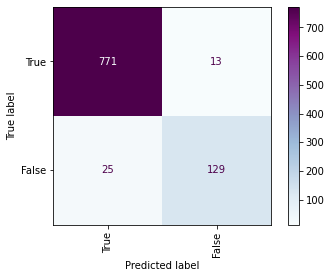

In [ ]:
st_time = time.time()
predictions, log_accuracy, metrics_report, log_prf = test_model(log_model, test_x, test_y)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(log_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(log_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

##Logistic Regression - PCA

Total time: 0.02s
accuracy: 0.894456289978678
              precision    recall  f1-score   support

       False       0.92      0.96      0.94       784
        True       0.74      0.55      0.63       154

    accuracy                           0.89       938
   macro avg       0.83      0.76      0.79       938
weighted avg       0.89      0.89      0.89       938



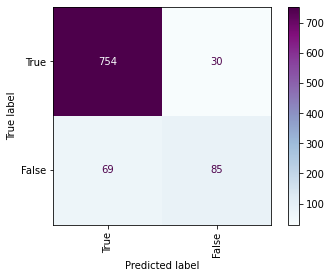

In [ ]:
st_time = time.time()
predictionspca, logpca_accuracy, metrics_reportpca, logpca_prf = test_model(logpca_model, test_x1, test_y)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(logpca_accuracy))
print('='*100)
print(metrics_reportpca)
plot_confusion_matrix(logpca_model, test_x1, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

##Naive Bayes

Total time: 0.01s
accuracy: 0.9477611940298507
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       784
        True       0.83      0.85      0.84       154

    accuracy                           0.95       938
   macro avg       0.90      0.91      0.91       938
weighted avg       0.95      0.95      0.95       938



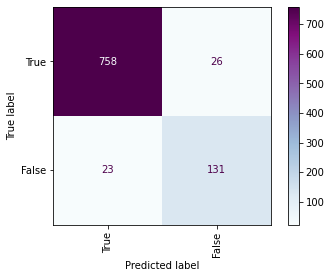

In [ ]:
st_time = time.time()
predictions, nb_accuracy, metrics_report, nb_prf = test_model(nb_model, test_x, test_y)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(nb_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(nb_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

##Decision Tree Classiier

Total time: 0.01s
accuracy: 0.9957356076759062
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       784
        True       0.99      0.98      0.99       154

    accuracy                           1.00       938
   macro avg       0.99      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



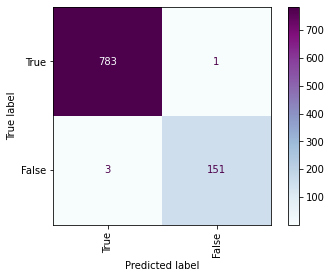

In [ ]:
st_time = time.time()
predictions, dt_accuracy, metrics_report, dt_prf = test_model(dt_model, test_x, test_y)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(dt_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(dt_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

##Random Forest Classifier

Total time: 0.22s
accuracy: 0.9968017057569296
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       784
        True       0.99      0.99      0.99       154

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



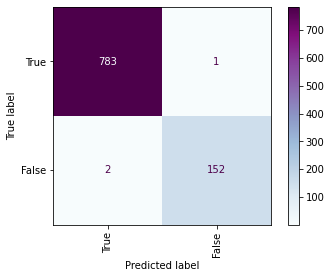

In [ ]:
st_time = time.time()
predictions, rf_accuracy, metrics_report, rf_prf = test_model(rf_model, test_x, test_y)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(rf_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(rf_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

##Hard Voting Classifier

Total time: 0.05s
accuracy: 0.9744136460554371
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       784
        True       0.94      0.90      0.92       154

    accuracy                           0.97       938
   macro avg       0.96      0.95      0.95       938
weighted avg       0.97      0.97      0.97       938



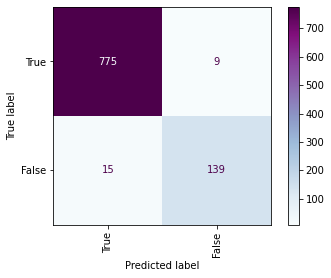

In [ ]:
st_time = time.time()
predictions, hard_accuracy, metrics_report, hard_prf = test_model(hard_model, test_x, test_y)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(hard_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(hard_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

##Gradient Boosting

Total time: 0.02s
accuracy: 0.9968017057569296
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       784
        True       0.99      0.99      0.99       154

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938

Applying cross validation
accuracy: 0.9959988116458706
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       784
        True       0.99      0.99      0.99       154

    accuracy                           1.00       938
   macro avg       1.00      0.99      0.99       938
weighted avg       1.00      1.00      1.00       938



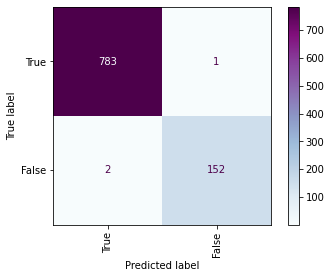

In [ ]:
st_time = time.time()
predictions, gb_accuracy, metrics_report, gb_prf = test_model(gb_model, test_x, test_y)
en_time = time.time()
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(gb_accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(gb_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")
print('='*100)
print("Applying cross validation")
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(gb_model, train_x, train_y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('accuracy: {}'.format((n_scores.sum())/len(n_scores)))
print(classification_report(test_y,gb_model.predict(test_x)))

#ANN

Total time: 0.15s
accuracy: 0.9520255863539445
              precision    recall  f1-score   support

       False       0.97      0.97      0.97       784
        True       0.86      0.85      0.85       154

    accuracy                           0.95       938
   macro avg       0.91      0.91      0.91       938
weighted avg       0.95      0.95      0.95       938



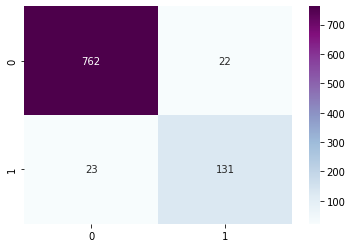

In [ ]:
# Predicting the Test set results
st_time = time.time()
y_pred = ann.predict(test_x1)
en_time = time.time()
y_pred = (y_pred > 0.5)
ann_accuracy = accuracy_score(y_pred, test_y)
metrics_report = classification_report(test_y, y_pred)
precision, recall, fscore, train_support = score(test_y, y_pred, average='weighted')
ann_prf =(precision, recall, fscore)
print('Total time: {:.2f}s'.format(en_time-st_time))
print('accuracy: {}'.format(ann_accuracy))
print('='*100)
print(metrics_report)
cm=confusion_matrix(test_y,y_pred)
sns.heatmap(cm, annot=True, fmt='d',cmap="BuPu")


# Model Evaluation

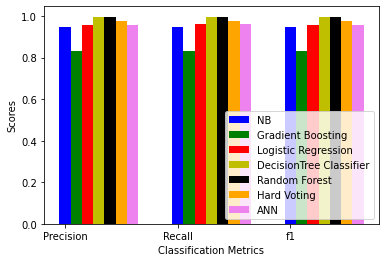

In [ ]:
# classification matric indices
xx = np.array([1,2,3])
width = 0.1
gb_prf = np.array([0.83, 0.83, 0.83])
ax = plt.subplot(111)
ax.bar( xx - width, height=np.array(nb_prf), width=width, color='b', align='center', label='NB', tick_label=['Precision', 'Recall', 'f1'])
ax.bar(xx ,height=np.array(gb_prf), width=width, color='g', align='center', label='Gradient Boosting')
ax.bar(xx + width, height=np.array(log_prf), width=width, color='r', align='center', label='Logistic Regression')
ax.bar(xx + 2*width, height=np.array(dt_prf), width=width, color='y', align='center', label='DecisionTree Classifier')
ax.bar(xx + 3*width, height=np.array(rf_prf), width=width, color='black', align='center', label='Random Forest')
ax.bar(xx + 4*width, height=np.array(hard_prf), width=width, color='orange', align='center', label='Hard Voting')
ax.bar(xx + 5*width, height=np.array(log_prf), width=width, color='violet', align='center', label='ANN')


plt.xlabel('Classification Metrics')
plt.ylabel('Scores')
plt.legend(loc='lower right')
plt.show()

In [ ]:
cl_metric = pd.DataFrame(data = {"Models":[],"Precision":[],"recall":[],"f1-score":[],"accuracy_score":[]})
prfs=[("Logistic Regression",log_prf),("Logistic Regression PCA",logpca_prf),("Naive Bayes",nb_prf),("Decision Tree",dt_prf),("Majority Voting",hard_prf),("Random Forest",rf_prf),("Gradient Boosting",tuple(gb_prf)),("ANN",ann_prf)]
names=[]
pre=[]
rec=[]
f1=[]
ac=[log_accuracy,logpca_accuracy,nb_accuracy,dt_accuracy,hard_accuracy,rf_accuracy,gb_accuracy,ann_accuracy]
for name,(p,r,f) in prfs:
  names.append(name)
  pre.append(p)
  rec.append(r)
  f1.append(f)
cl_metric["Models"]=names
cl_metric["Precision"]=pre
cl_metric["recall"]=rec
cl_metric["f1-score"]=f1
cl_metric["accuracy_score"]=ac

In [ ]:
display(cl_metric)

,Models,Precision,recall,f1-score,accuracy_score
0,Logistic Regression,0.958719,0.959488,0.958821,0.959488
1,Logistic Regression PCA,0.887096,0.894456,0.888086,0.894456
2,Naive Bayes,0.948197,0.947761,0.947963,0.947761
3,Decision Tree,0.995730,0.995736,0.995724,0.995736
4,Majority Voting,0.974146,0.974414,0.974208,0.974414
5,Random Forest,0.996797,0.996802,0.996798,0.996802
6,Gradient Boosting,0.830000,0.830000,0.830000,0.996802
7,ANN,0.951904,0.952026,0.951963,0.952026


#Inference:

*   Bagging and stacking ensemble is not needed becuase we already got 99% accuracy in Boosting. Hence, we don't need bagging and stacking method to further  improving the accuracy.


*   From the above comparison Gradient Boosting model is more reliable than the other models.


